PARKINSON’S DISEASE PREDICTION USING LINEAR REGRESSION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

 Importing Necessary Libraries

In [4]:
import pandas as pd
import requests
import io
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
# url="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
# s=requests.get(url).content
# c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c= pd.read_csv("parkinsons_updrs.csv")

col = c.columns
print (col)
c.corr()

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [6]:
pd.set_option('display.max_columns', None)
c.head()
print(c.shape)
c.describe()
# c.info()
c.isnull().sum() # there is no missing value 

(5875, 22)


subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

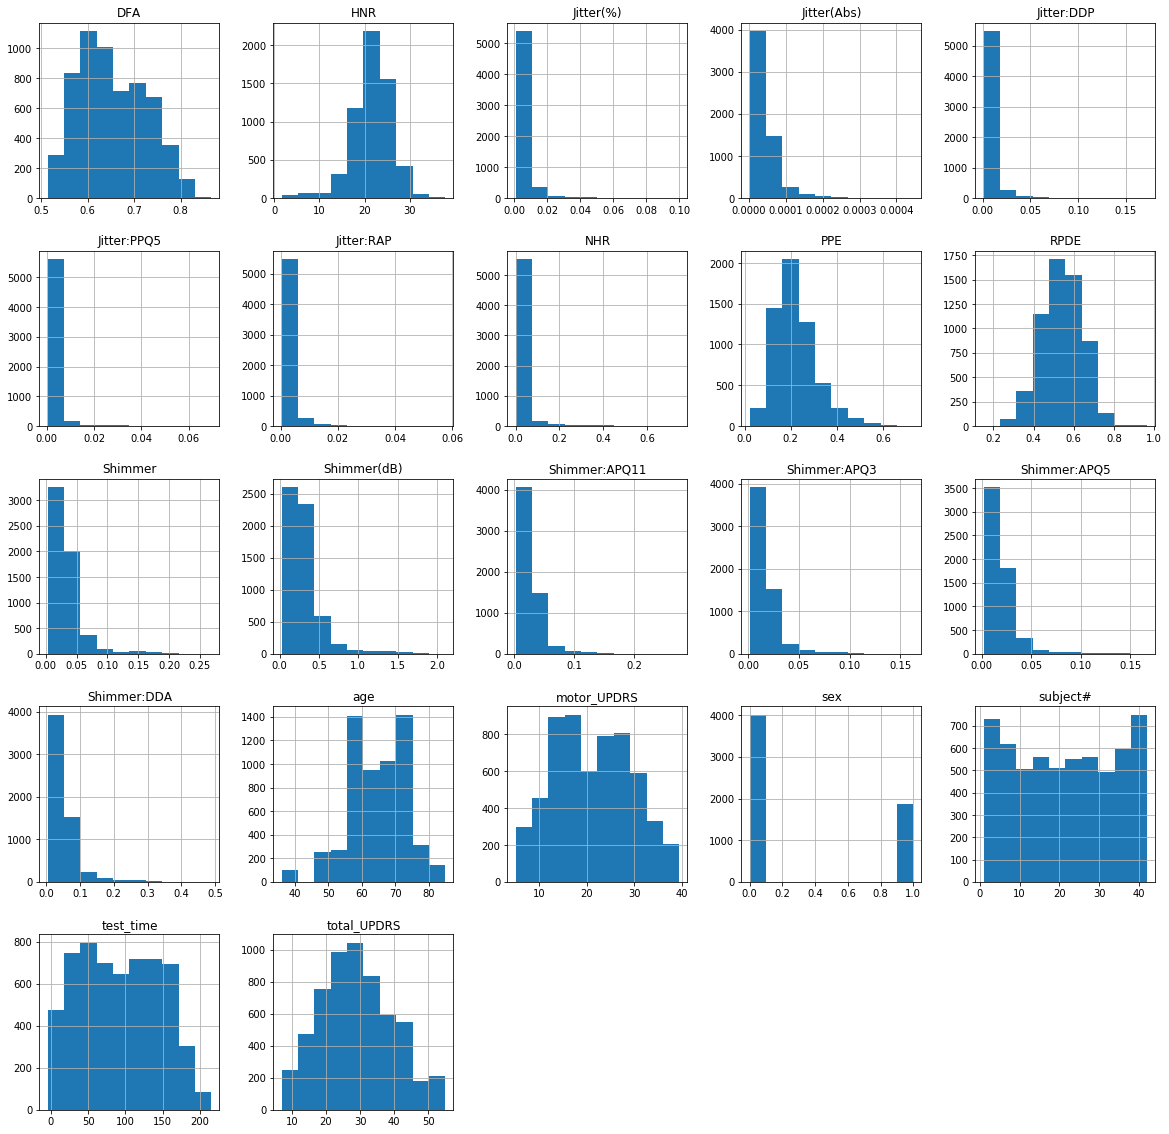

In [7]:
c.hist(figsize = (20,20))
plt.show()

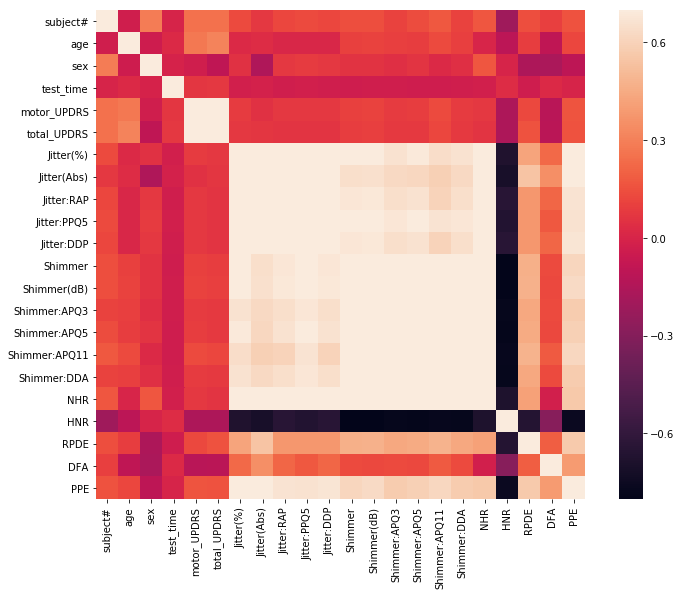

In [8]:
# correlation matrix
corrmat = c.corr()
fig = plt.figure(figsize = (12,9))

sn.heatmap(corrmat, vmax = .7, square = True)
plt.show()

In [9]:
columns = c.columns.tolist()
columns = [c for c in columns if c in ['age','subject#','HNR','RPDE','PPE','Shimmer:APQ11','DFA']]
data= c[columns]
# columns = [c for c in columns if c not in ['total_UPDRS','sex']]
target = c[['total_UPDRS']].values.reshape(-1, 1)

print(target.shape)
print(data.shape)


(5875, 1)
(5875, 7)


In [10]:
c['total_UPDRS'].describe()

count    5875.000000
mean       29.018942
std        10.700283
min         7.000000
25%        21.371000
50%        27.576000
75%        36.399000
max        54.992000
Name: total_UPDRS, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION


In [41]:
 def plotActPredOverIdeal(y_act,y_pred, alg,c1):
        rmse= format(mean_squared_error(y_act,y_pred),",.2f")      
        p1 =plt.scatter(y_act,y_pred,c=c1)
        maxValue = max(max(y_act), max(y_pred))
        p2, = plt.plot([0, maxValue], [0, maxValue], color='#808080', linestyle='--', linewidth=2)
        #plt.legend([p1, p2],["RMSE: %s days"%rmse, "Ideal prediction"],loc=0)
        plt.legend([p1,p2],["MSE: %s"%rmse, "Ideal prediction"],loc=0)
        plt.grid()
        plt.xlabel('Actual total_UPDRS')
        plt.ylabel('Predicted total_UPDRS')
        plt.title("Forecasting total_UPDRS using %s"%alg)
        plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

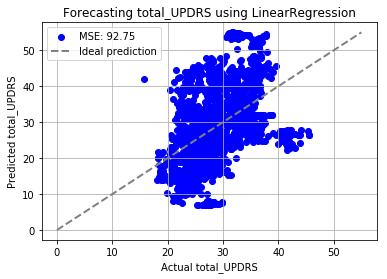

In [14]:
predictionLR = LR.predict(X_test)
mseLR =mean_squared_error(predictionLR,y_test)
plotActPredOverIdeal(predictionLR,y_test,'LinearRegression','blue')

In [15]:
# pred_series = pd.Series(prediction)
# pred_series.to_csv('LinearRegression1.csv')
# pd.DataFrame(prediction).to_csv("LinearRegression1.csv", header=None, index=None)

In [16]:
# %ls

In [17]:
# Building ensemble using Random Forest
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

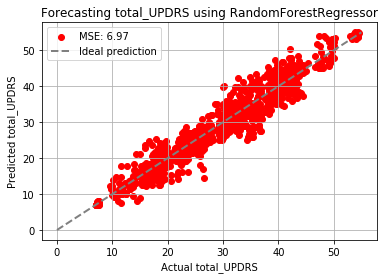

In [18]:
predictionRF = RFR.predict(X_test)
mseRF=mean_squared_error(predictionRF,y_test)
plotActPredOverIdeal(predictionRF,y_test,'RandomForestRegressor','red')

In [19]:
# #  pred_series = pd.Series(prediction)
# #  pred_series.to_csv('RandomForestRegressor.csv', header=None, index=None)
# pd.DataFrame(prediction).to_csv("RFR.csv", header=None, index=None)

In [20]:
total_UPDRS_max=c['total_UPDRS'].max()
total_UPDRS_min=c['total_UPDRS'].min()
l=total_UPDRS_max-total_UPDRS_min


In [21]:
#Normalized Root Mean Squared Error (NRMSE)-LR
NRMSE_LR= math.sqrt(mseLR)/l
NRMSE_LR

0.20067541710582776

In [22]:
#Normalized Root Mean Squared Error (NRMSE)-RF
NRMSE_RF= math.sqrt(mseRF)/l
NRMSE_RF

0.05501096278077054

In [23]:
# RFR = pd.read_csv("LinearRegression1.csv",)
# RFR.head(20)

In [24]:
# LR = pd.read_csv("RFR.csv")
# LR.head(20)

In [25]:
# pred_series = pd.Series(target)
# pred_series.to_csv('target.csv')
# target.to_csv(index=False)
# pd.DataFrame(y_test).to_csv("target.csv", header=None, index=None)

In [26]:
# TR = pd.read_csv('target.csv')
# TR.head(20)

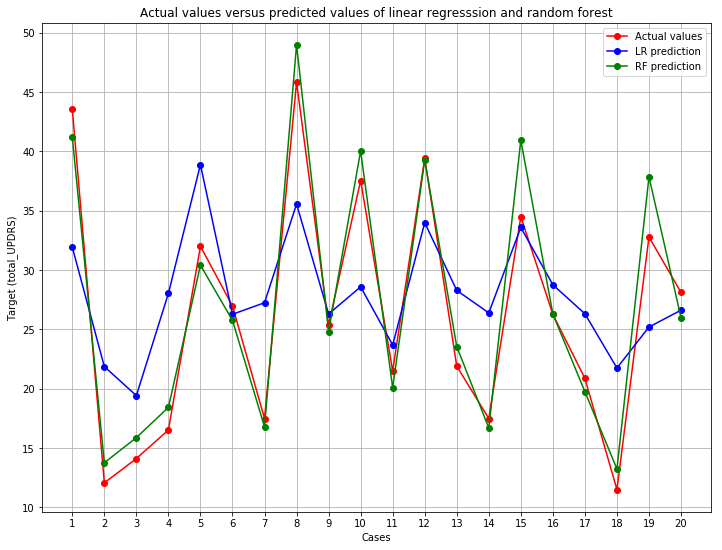

In [27]:
n=20
x=range(1,n+1) 
fig = plt.figure(figsize = (12,9))
actP, =plt.plot(x,y_test[:n],c="red", marker="o")
lrP, =plt.plot(x,predictionLR[:n],c="blue",marker="o")
rfP, =plt.plot(x,predictionRF[:n],c="green",marker="o")
plt.title("Actual values versus predicted values of linear regresssion and random forest")
plt.xlabel('Cases')
plt.ylabel('Target (total_UPDRS)')
plt.xticks([int(i) for i in x])
plt.grid()
plt.legend([actP,lrP,rfP],["Actual values", "LR prediction","RF prediction"],loc=0)
plt.show()


In [28]:
plt.savefig('image.jpg')

<Figure size 432x288 with 0 Axes>